In [2]:
import pandas as pd
import numpy as np
import os
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import sys
from PIL import Image
from umap.umap_ import UMAP
import matplotlib.pyplot as plt

In [3]:
quantified_directory = '/home/mass_spec_img/mass_spec_img/data/quantified_3snr_hotspot_removal'
df = pd.DataFrame()
y_max = 0
slide_names = ['SQ1631','SQ1632', 'SQ1633', 'SQ1634', 'SQ1635', 'SQ1636']
tissue_names = ['S1', 'S2', 'S3', 'S4']
for s in slide_names:
    slide_df = pd.DataFrame()
    for t in tissue_names:
        st = s+t+"_consensus_aligned_hotspot_removal_output.tsv"
        sub_df = pd.read_csv(os.path.join(quantified_directory, st), sep="\t")
        scaler = MinMaxScaler()
        for column in sub_df.columns[2:]:
            sub_df[column] = scaler.fit_transform(sub_df[[column]])
        sub_df['new_Y'] = sub_df['Y']
        cols = list(sub_df.columns)
        cols.insert(2, cols.pop(cols.index('new_Y')))
        sub_df = sub_df[cols]
        slide_df = pd.concat([slide_df, sub_df], axis=0)
    slide_df['new_Y'] += y_max
    y_max = slide_df['new_Y'].max()
    df = pd.concat([df, slide_df], axis=0)
#df.to_csv("/home/mass_spec_img/mass_spec_img/data/quantified/SQ1632_1636_3snr.tsv", sep="\t", index=False)

df.head()


X    Y  new_Y  mz798.555_mob1.49  mz772.482_mob1.46  mz826.573_mob1.51  \
0  1331  589    589           0.000000           0.190948            0.12500   
1  1332  589    589           0.000000           0.111740            0.00000   
2  1333  589    589           0.000000           0.158416            0.09375   
3  1334  589    589           0.000000           0.157001            0.09375   
4  1335  589    589           0.272727           0.137199            0.00000   

   mz713.454_mob1.41  mz534.294_mob1.17  mz826.518_mob1.5  mz820.515_mob1.48  \
0           0.000000                0.0          0.629344                0.0   
1           0.000000                0.0          0.586873                0.0   
2           0.230769                0.0          0.613900                0.0   
3           0.000000                0.0          0.629344                0.0   
4           0.000000                0.0          0.525097                0.0   

   ...  mz660.365_mob1.3  mz553.943_mob1.04  mz785.522_mob1.46  \
0  ...          0.363636                0.0           0.911765   
1  ...          0.000000                0.0           0.926471   
2  ...          0.000000                0.0           0.647059   
3  ...          0.000000                0.0           1.000000   
4  ...          0.000000                0.0           0.676471   

   mz564.863_mob1.09  mz834.515_mob1.55  mz794.555_mob1.5  mz778.482_mob1.43  \
0                0.0           0.275862              0.00           0.214286   
1                0.0           0.448276              0.00           0.642857   
2                0.0           0.379310              0.15           0.678571   
3                0.0           0.275862              0.00           0.500000   
4                0.0           0.137931              0.15           0.821429   

   mz444.894_mob1.1  mz555.929_mob1.11  mz399.914_mob1.03  
0          0.272727                0.0                0.0  
1          0.000000                0.0                0.0  
2          0.000000                0.0                0.0  
3          0.000000                0.0                0.0  
4          0.000000                0.0                0.0  

[5 rows x 87 columns]

In [4]:
df

X    Y  new_Y  mz798.555_mob1.49  mz772.482_mob1.46  \
0      1331  589    589           0.000000           0.190948   
1      1332  589    589           0.000000           0.111740   
2      1333  589    589           0.000000           0.158416   
3      1334  589    589           0.000000           0.157001   
4      1335  589    589           0.272727           0.137199   
...     ...  ...    ...                ...                ...   
73801  2511  766   5027           0.321328           0.000000   
73802  2512  766   5027           0.174462           0.709677   
73803  2513  766   5027           0.333022           0.000000   
73804  2514  766   5027           0.418148           0.000000   
73805  2515  766   5027           0.241347           0.096774   

       mz826.573_mob1.51  mz713.454_mob1.41  mz534.294_mob1.17  \
0               0.125000           0.000000           0.000000   
1               0.000000           0.000000           0.000000   
2               0.093750           0.230769           0.000000   
3               0.093750           0.000000           0.000000   
4               0.000000           0.000000           0.000000   
...                  ...                ...                ...   
73801           0.161141           0.179342           0.134831   
73802           0.161141           0.127128           0.050562   
73803           0.161141           0.145289           0.174157   
73804           0.161141           0.178207           0.185393   
73805           0.161141           0.154370           0.179775   

       mz826.518_mob1.5  mz820.515_mob1.48  ...  mz660.365_mob1.3  \
0              0.629344           0.000000  ...          0.363636   
1              0.586873           0.000000  ...          0.000000   
2              0.613900           0.000000  ...          0.000000   
3              0.629344           0.000000  ...          0.000000   
4              0.525097           0.000000  ...          0.000000   
...                 ...                ...  ...               ...   
73801          0.000000           0.223570  ...          0.000000   
73802          0.000000           0.315425  ...          0.076923   
73803          0.000000           0.268631  ...          0.153846   
73804          0.000000           0.249567  ...          0.205128   
73805          0.000000           0.263432  ...          0.000000   

       mz553.943_mob1.04  mz785.522_mob1.46  mz564.863_mob1.09  \
0               0.000000           0.911765               0.00   
1               0.000000           0.926471               0.00   
2               0.000000           0.647059               0.00   
3               0.000000           1.000000               0.00   
4               0.000000           0.676471               0.00   
...                  ...                ...                ...   
73801           0.780488           0.153846               0.48   
73802           0.390244           0.230769               0.00   
73803           0.926829           0.358974               0.56   
73804           1.000000           0.256410               0.44   
73805           1.000000           0.256410               0.56   

       mz834.515_mob1.55  mz794.555_mob1.5  mz778.482_mob1.43  \
0               0.275862          0.000000           0.214286   
1               0.448276          0.000000           0.642857   
2               0.379310          0.150000           0.678571   
3               0.275862          0.000000           0.500000   
4               0.137931          0.150000           0.821429   
...                  ...               ...                ...   
73801           0.000000          0.000000           0.000000   
73802           0.000000          0.000000           0.000000   
73803           0.000000          0.000000           0.000000   
73804           0.000000          0.000000           0.000000   
73805           0.000000          0.157895           0.000000   

       mz444.894_mob1.1  mz555.92

In [5]:
def colnorm(X):
    return X / np.sum(X, axis=0, keepdims=True)


def plsa(X, num_components, relative_change=1e-4, maxIter=1000):
    pca_scaler = None
    Xt = np.transpose(X)
    (num_channels, num_spectra) = Xt.shape

    eps =  np.finfo(float).eps
    ct = colnorm(np.random.rand(num_channels, num_components));
    ts = colnorm(np.ones((num_components, num_spectra)))

    last_change = 1.0 / eps
    err = 1e10
    iteration = 0

    while (last_change > relative_change) and (iteration < maxIter):
        ts = colnorm(np.multiply(ts, np.matmul(np.transpose(ct), np.divide(Xt, (np.matmul(ct, ts) + eps)))))
        ct = colnorm(np.multiply(ct, np.matmul(np.divide(Xt, (np.matmul(ct,ts) + eps)), np.transpose(ts))))

        model = np.multiply(np.matmul(np.ones((num_channels, 1)), np.sum(Xt, axis=0, keepdims=True)), np.matmul(ct, ts))
        errold = err
        err = np.sum(np.square(np.subtract(Xt, model)))
        
        last_change = abs((err - errold) / err)
        iteration = iteration + 1

        if not (iteration % 25 ):
            print(f"Iteration {iteration}: relative change is {last_change}")

    loglik = np.sum(np.multiply(Xt, np.log(np.matmul(ct, ts) + eps)))

    return((ct, ts, loglik))

def spartial_visualize(df, n_components=3, method="PCA"):
    data = df.iloc[:, 3:].to_numpy()

    if method == "UMAP":
        fit = UMAP(n_components=n_components)
        data = fit.fit_transform(data)

    if method == "PLSA":
        (ct, wt, loglik) = plsa(data, num_components=3)
        data = np.transpose(wt)

    if method == "PCA":
        pca_data = StandardScaler().fit_transform(data)
        pca_scaler = PCA(n_components=n_components)
        data = pca_scaler.fit_transform(pca_data) 

    

    # get the coordinates of the pixels for the output image
    xmin, xmax = df['X'].min(), df['X'].max()
    ymin, ymax = df['new_Y'].min(), df['new_Y'].max()
    df['X'] -= xmin
    df['new_Y'] -= ymin

    width = xmax - xmin + 1
    height = ymax - ymin + 1

    pca_mode = False
    if (np.max(data) > 1) or (np.min(data) < 0):
        pca_mode = True
        for i in range(data.shape[1]):
            v = data[:, i]
            data[:, i] = (v - v.min()) / (v.max() - v.min())

    img = Image.new('RGB', (width, height), color='black')

    red_color = np.array((255, 0, 0))
    cred_color = np.array((0, 255, 255))
    green_color = np.array((0, 255, 0))
    cgreen_color = np.array((255, 0, 255))
    blue_color = np.array((0, 0, 255))
    cblue_color = np.array((255, 255, 0))

    xp = 1
    
    for r in range(data.shape[0]):
        the_color = np.zeros(3)
        i = 0
        rval = (data[r,i] - 0.5) / 0.5
        if rval > 0:
            the_color += rval * red_color
        else:
            the_color += (-1 * rval) * cred_color
        i = 1
        gval = (data[r,i] - 0.5) / 0.5
        if gval > 0:
            the_color += gval * green_color
        else:
            the_color += (-1 * gval) * cgreen_color
        i = 2
        bval = (data[r,i] - 0.5) / 0.5
        if bval > 0:
            the_color += bval * blue_color
        else:
            the_color += (-1 * bval) * cblue_color

        the_color /= (255 * 3)

        the_color *= 255

        for i in range(xp):
            for j in range(xp):
                img.putpixel((df.iloc[r,0] + i,df.iloc[r,2] + j), tuple(np.int32(the_color)))

    return img, pca_scaler


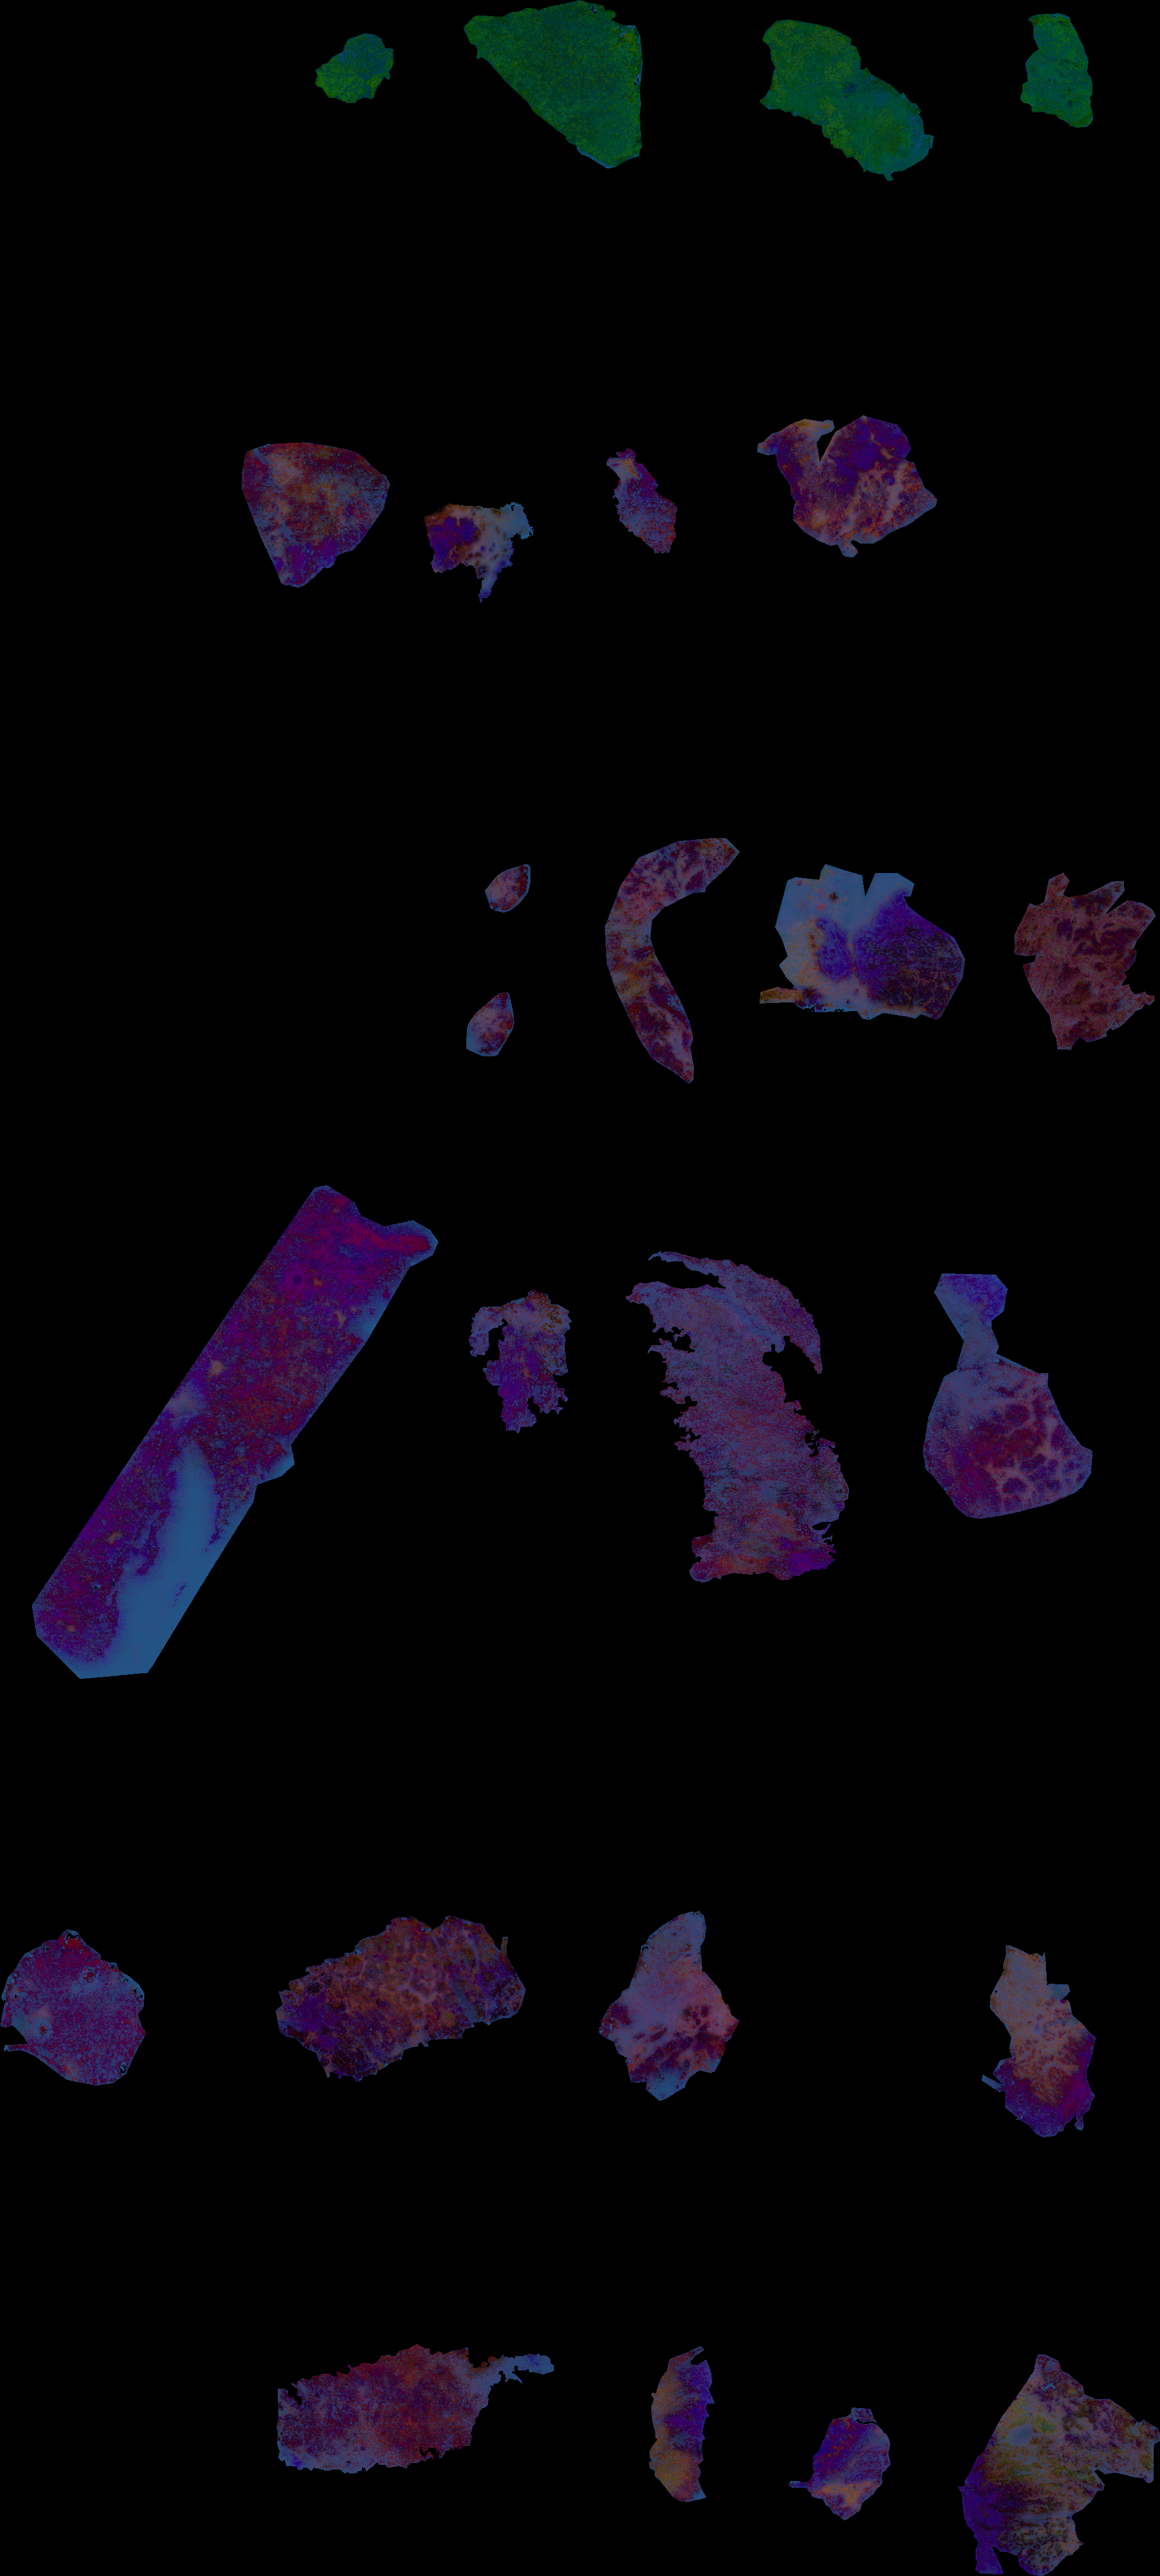

In [6]:
img, pca_scaler = spartial_visualize(df, 3, "PCA")
display(img)

In [7]:
feature_weights = pd.DataFrame(
    pca_scaler.components_.T,  # Transpose to get features as rows, PCs as columns
    columns=[f'PC{i+1}' for i in range(pca_scaler.n_components_)],
    index=df.columns[3:]
)

# Get the transformed data points
# This shows each original data point in the new PC space
transformed_df = pd.DataFrame(
    df.iloc[:, 2:],
    columns=[f'PC{i+1}' for i in range(pca_scaler.n_components_)]
)

# If you want to see how much each PC explains the variance
explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(pca_scaler.n_components_)],
    'Explained Variance Ratio': pca_scaler.explained_variance_ratio_,
    'Cumulative Variance Ratio': np.cumsum(pca_scaler.explained_variance_ratio_)
})


In [8]:
# Display the results
print("Feature loadings for each principal component:")
print(feature_weights)
print("\nTransformed data points:")
print(transformed_df.head())
print("\nExplained variance:")
print(explained_variance)

Feature loadings for each principal component:
                        PC1       PC2       PC3
mz798.555_mob1.49  0.100484  0.020637 -0.077520
mz772.482_mob1.46  0.050793  0.162676  0.010096
mz826.573_mob1.51  0.159620 -0.010484 -0.110239
mz713.454_mob1.41  0.132374  0.094078  0.144307
mz534.294_mob1.17  0.099175 -0.170851  0.109005
...                     ...       ...       ...
mz794.555_mob1.5   0.078535  0.037356 -0.041421
mz778.482_mob1.43  0.098150  0.106782  0.049413
mz444.894_mob1.1   0.016303 -0.057303 -0.078819
mz555.929_mob1.11  0.025202 -0.085575 -0.120541
mz399.914_mob1.03  0.002266 -0.098100 -0.037022

[84 rows x 3 columns]

Transformed data points:
   PC1  PC2  PC3
0  NaN  NaN  NaN
1  NaN  NaN  NaN
2  NaN  NaN  NaN
3  NaN  NaN  NaN
4  NaN  NaN  NaN

Explained variance:
    PC  Explained Variance Ratio  Cumulative Variance Ratio
0  PC1                  0.273569                   0.273569
1  PC2                  0.115149                   0.388718
2  PC3                  0

  Top features for PC1 Top features for PC2 Top features for PC3
0    mz740.468_mob1.43     mz826.518_mob1.5    mz744.503_mob1.44
1    mz766.479_mob1.45    mz792.521_mob1.48     mz850.564_mob1.5
2     mz739.453_mob1.4     mz832.529_mob1.5    mz949.526_mob1.54
3    mz824.553_mob1.51     mz725.51_mob1.44    mz849.558_mob1.52
4    mz826.573_mob1.51     mz806.499_mob1.5    mz948.534_mob1.56
5    mz800.547_mob1.46    mz834.515_mob1.55    mz770.505_mob1.44
6    mz768.483_mob1.43    mz820.515_mob1.48    mz833.585_mob1.53
7    mz825.552_mob1.49    mz846.527_mob1.48    mz851.587_mob1.54
8     mz711.44_mob1.39     mz790.52_mob1.49     mz742.474_mob1.4
9    mz827.576_mob1.52    mz534.294_mob1.17     mz711.44_mob1.39


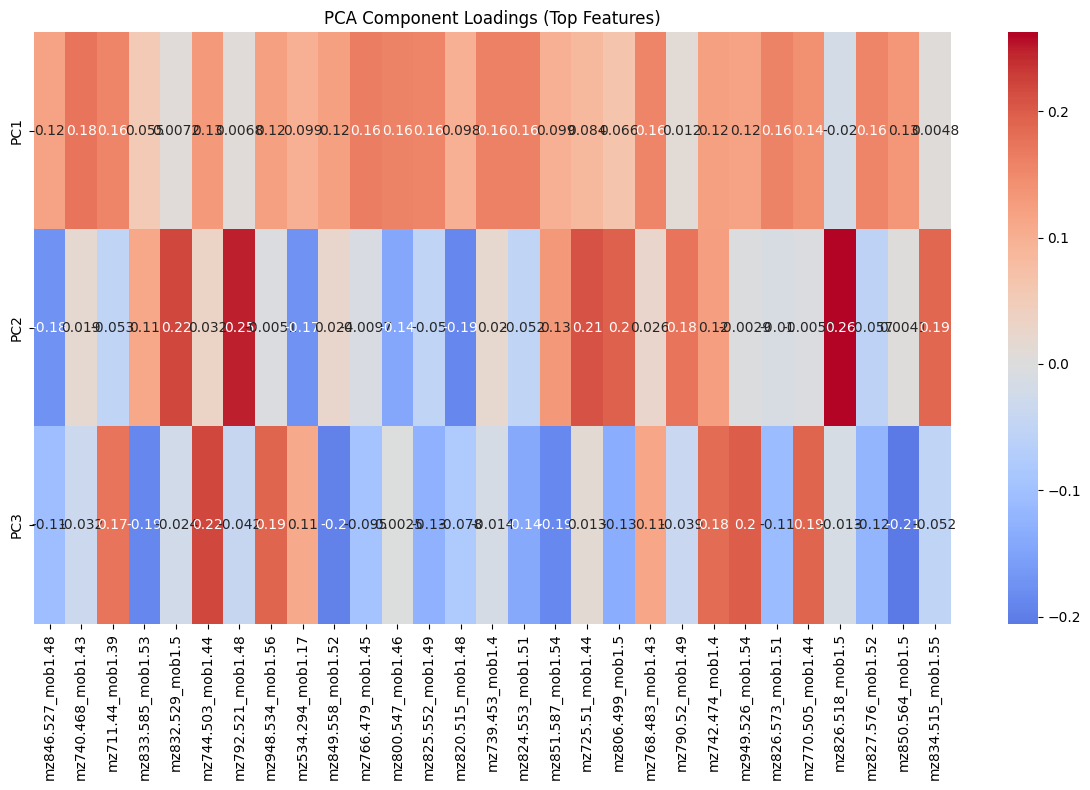

In [11]:
import seaborn as sns
loadings = pca_scaler.components_

loadings_df = pd.DataFrame(
    loadings,
    columns=df.columns[2:],  # Replace with your actual column names if different
    index=['PC1', 'PC2', 'PC3']
)
def get_top_features(loadings_df, n=10):
    top_features = pd.DataFrame()
    
    for i, component in enumerate(loadings_df.index):
        # Get absolute loadings and sort
        sorted_loadings = loadings_df.loc[component].abs().sort_values(ascending=False)
        # Keep top n features
        top_n = sorted_loadings.iloc[:n].index.tolist()
        top_features[f'Top features for {component}'] = pd.Series(top_n)
    
    return top_features

# Get top 10 features for each component
top_features = get_top_features(loadings_df, n=10)
print(top_features)

# Create filtered loadings DataFrame with only top features from all components
all_top_features = set()
for col in top_features.columns:
    all_top_features.update(top_features[col].dropna().tolist())

# Filter the loadings to only include these top features
filtered_loadings = loadings_df[list(all_top_features)]

# Create a more readable heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_loadings, cmap='coolwarm', center=0, annot=True)
plt.title('PCA Component Loadings (Top Features)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
coordinates = df.iloc[:, 0:2]
data = df.iloc[:, 3:]

# Apply PCA
pca = PCA(n_components=3)
pca.fit(data)

# Get the transformed data points
transformed_data = pca.transform(data)

# Create a new dataframe with coordinates and the 3 PCA components
pca_df = pd.concat(
    [coordinates.reset_index(drop=True), 
     pd.DataFrame(transformed_data, columns=['PC1', 'PC2', 'PC3'])],
    axis=1
)
pca_df.head()

X    Y       PC1       PC2       PC3
0  636  589 -0.580510  2.146068  0.216413
1  637  589 -0.336971  2.171196  0.053459
2  638  589 -0.302707  2.171747 -0.348007
3  639  589 -0.509609  2.264569  0.265149
4  640  589 -0.395932  2.092678 -0.088328

In [13]:
from PIL import Image
def dataframe_to_rgb_image(df, rgb_columns=['PC1', 'PC2', 'PC3']):
    """
    Create RGB image from dataframe using multiple columns as color channels.
    Optimized for memory efficiency with minimal data copying.
    """
    df['X'] -= df['X'].min()
    df['Y'] -= df['Y'].min()
    width = df['X'].max() + 1
    height = df['Y'].max() + 1
    
    # Pre-allocate RGB array
    rgb_image = np.zeros((height, width, 3), dtype=np.float64)
    
    # Extract coordinates once for efficiency
    y_coords = df['Y'].values
    x_coords = df['X'].values
    
    # Assign each channel using advanced indexing
    for i, col in enumerate(rgb_columns):
        # Normalize values to 0-1 range for proper color representation
        values = df[col].values
        normalized_values = (values - values.min()) / (values.max() - values.min())
        rgb_image[y_coords, x_coords, i] = normalized_values
    
    return rgb_image


quantified_directory = '/home/mass_spec_img/mass_spec_img/data/quantified_3snr_hotspot_removal'
output_directory = '/home/mass_spec_img/mass_spec_img/data/quantified_3snr_pca_images'
os.makedirs(output_directory, exist_ok=True)
slide_names = ['SQ1631', 'SQ1632', 'SQ1633', 'SQ1634', 'SQ1635', 'SQ1636']
tissue_names = ['S1', 'S2', 'S3', 'S4']
for s in slide_names:
    for t in tissue_names:
        st = s+t+"_consensus_aligned_hotspot_removal_output.tsv"
        tissue_df = pd.read_csv(os.path.join(quantified_directory, st), sep="\t")
        tissue_df = tissue_df.iloc[:, 0:2]
        merged_df = pd.merge(tissue_df, pca_df, on=['X', 'Y'], how='inner')
        rgb_image = dataframe_to_rgb_image(merged_df)
        

        # Clip values to [0,1] and scale to [0,255] for image saving
        rgb_uint8 = np.clip(rgb_image, 0, 1)
        rgb_uint8 = (rgb_uint8 * 255).astype(np.uint8)

        # Create PIL image and save as PNG
        img = Image.fromarray(rgb_uint8, mode='RGB')
        img.save(os.path.join(output_directory, f"{s}{t}_pca.png"))

TypeError: 'float' object cannot be interpreted as an integer

In [23]:
merged_df

X    Y       PC1       PC2       PC3
0      1331  589 -0.580510  2.146068  0.216413
1      1331  589  0.709797 -0.388949 -0.357136
2      1331  589  0.814564 -0.375624 -0.497578
3      1332  589 -0.336971  2.171196  0.053459
4      1332  589  0.226997 -0.628227 -0.182410
...     ...  ...       ...       ...       ...
24631  1310  710 -0.260012  2.297117 -0.224007
24632  1311  710 -0.716044  2.337237  0.427232
24633  1312  710 -0.329503  2.199575  0.360286
24634  1313  710 -0.859830  2.073245  0.554654
24635  1314  710 -0.595354  2.302308  0.432274

[24636 rows x 5 columns]